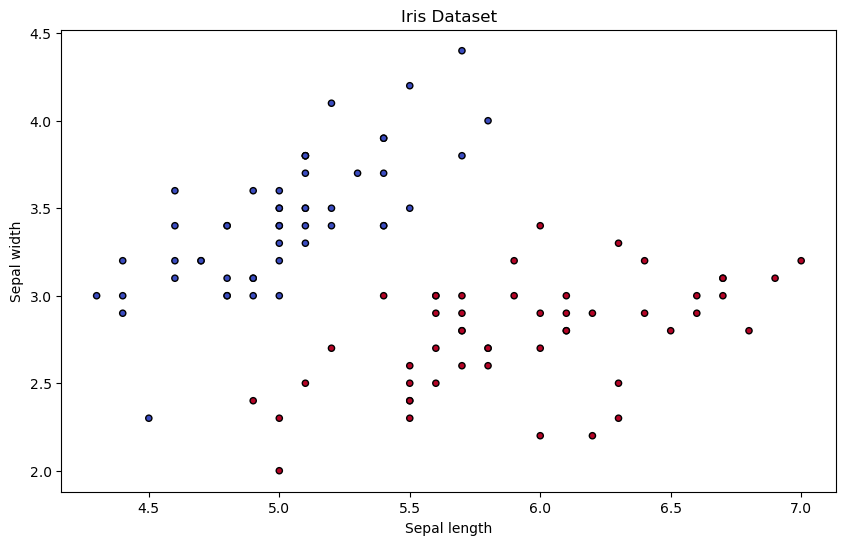

In [6]:
from sklearn import datasets
import numpy as np

# Load dataset
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Using only the first 100 instances and 2 features for visualization
y = iris.target[:100]

# Visualize the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Iris Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

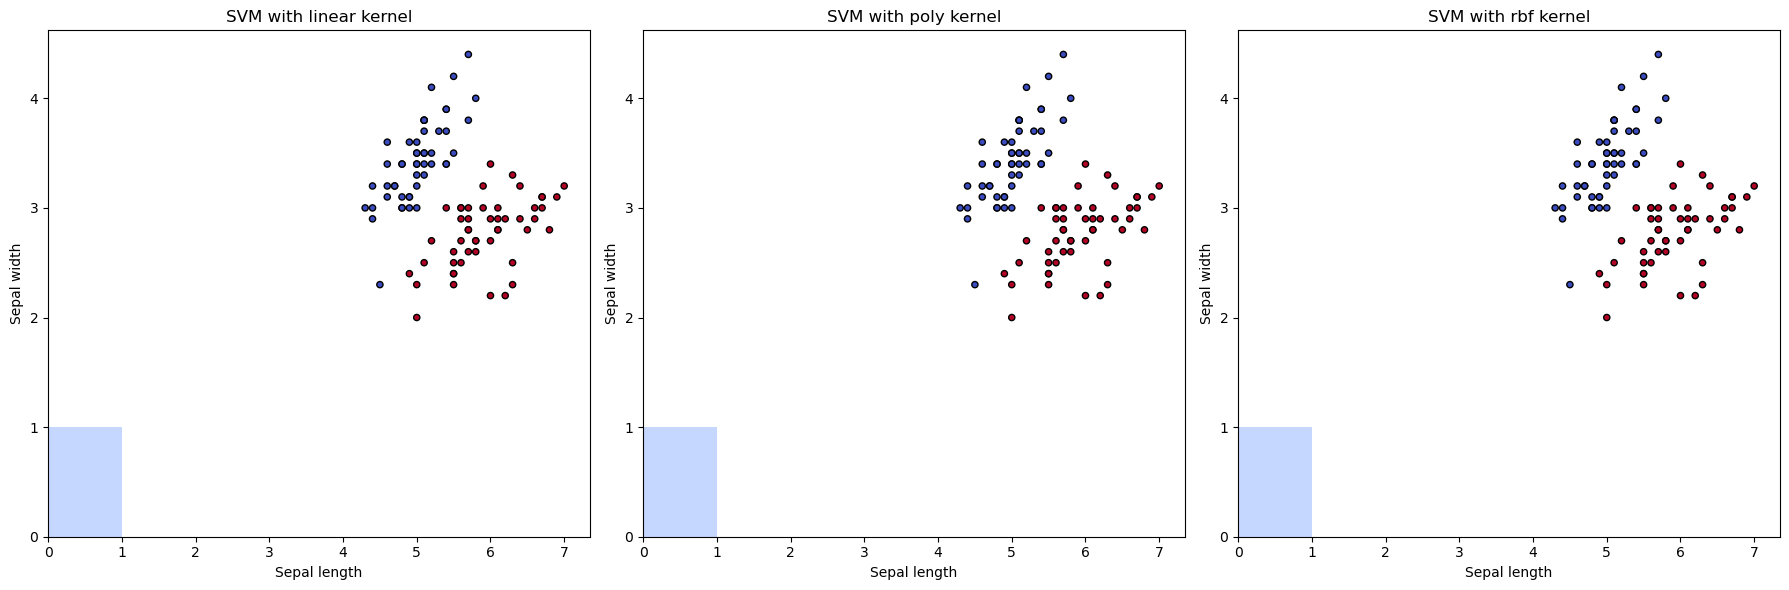

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define kernels
kernels = ['linear', 'poly', 'rbf']

# Create a figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, kernel in zip(axes, kernels):
    # Train SVM
    clf = make_pipeline(StandardScaler(), SVC(kernel=kernel))
    clf.fit(X, y)
    
    # Plot decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
    ax.set_title(f'SVM with {kernel} kernel')
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')

plt.tight_layout()
plt.show()

In [3]:
# 2. Preprocess the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# It's often a good idea to scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define kernel functions to use
kernels = ['linear', 'poly', 'rbf']

In [12]:
# 3. Train SVM Classifiers
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)

# 4. Evaluate Performance
    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Results for {kernel} kernel:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")
   

Results for linear kernel:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Results for poly kernel:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000

Results for rbf kernel:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000



The final part of the script (not explicitly coded) involves comparing the performance metrics across different kernels to discuss and conclude which kernel function performs best for this particular binary classification task on the Iris dataset.

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('A:/Iris.csv')

# Adjust column names to lower case and strip leading/trailing spaces right after loading the data
df.columns = df.columns.str.lower().str.strip()

# Now, print the adjusted column names to verify
print(df.columns)

# Map species to numeric values
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

# Since we've adjusted the column names, use the correct, adjusted names to select three features and target
X = df[['sepallengthcm', 'sepalwidthcm', 'petallengthcm']].values
y = df['species'].values

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')


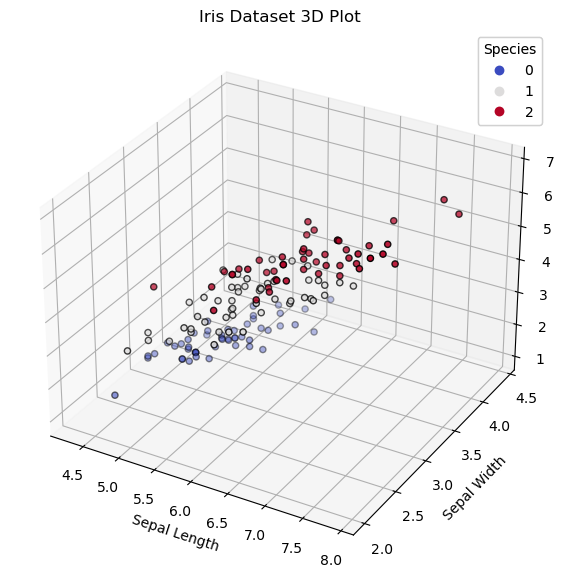

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolor='k', s=20)
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('Iris Dataset 3D Plot')
plt.show()

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define kernels
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    # Train SVM
    clf = make_pipeline(StandardScaler(), SVC(kernel=kernel, decision_function_shape='ovo'))
    clf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy for {kernel} kernel: {accuracy:.4f}")

Accuracy for linear kernel: 1.0000
Accuracy for poly kernel: 0.8889
Accuracy for rbf kernel: 1.0000


In [27]:
import pandas as pd

# Define the new sample data
data = {'SepalLengthCm': [5.1], 'SepalWidthCm': [3.5], 'PetalLengthCm': [1.4], 'PetalWidthCm': [0.2]}
sample_df = pd.DataFrame(data)

# Define a simple rule-based classifier for three classes
def classify_iris(row):
    if row['PetalLengthCm'] <= 1.9 and row['PetalWidthCm'] <= 0.6:
        return "Iris Setosa"
    elif row['PetalLengthCm'] <= 4.9 and row['PetalWidthCm'] <= 1.7:
        return "Iris Versicolor"
    else:
        return "Iris Virginica"

# Apply the classifier to the sample
sample_df['Classification'] = sample_df.apply(classify_iris, axis=1)

# Output the result
print(sample_df['Classification'])

0    Iris Setosa
Name: Classification, dtype: object


In [32]:
# Assuming clf is the trained pipeline with the best-performing kernel
# Define a new sample with the features 'sepallengthcm', 'sepalwidthcm', and 'petallengthcm'
new_sample = [[7,3.2,4.7]]

# Predict the species for the new sample
predicted_species = clf.predict(new_sample)

# Map the numeric prediction back to the species name
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
predicted_species_name = species_mapping[predicted_species[0]]

print(f"The predicted species for the new sample is: {predicted_species_name}")

The predicted species for the new sample is: Iris-versicolor


In [33]:
import numpy as np

# Define three new samples with typical measurements for each species
# These values are chosen based on typical feature ranges for each class
sample_setosa = np.array([[5.0, 3.6, 1.4]])  # Typical measurements for Iris Setosa
sample_versicolor = np.array([[6.0, 2.9, 4.5]])  # Typical measurements for Iris Versicolor
sample_virginica = np.array([[6.5, 3.0, 5.5]])  # Typical measurements for Iris Virginica

# Use the trained classifier to predict the species for each new sample
predicted_setosa = clf.predict(sample_setosa)
predicted_versicolor = clf.predict(sample_versicolor)
predicted_virginica = clf.predict(sample_virginica)

# Map the numeric prediction back to the species name
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Output the predictions
print(f"The predicted species for the Setosa sample is: {species_mapping[predicted_setosa[0]]}")
print(f"The predicted species for the Versicolor sample is: {species_mapping[predicted_versicolor[0]]}")
print(f"The predicted species for the Virginica sample is: {species_mapping[predicted_virginica[0]]}")

The predicted species for the Setosa sample is: Iris-setosa
The predicted species for the Versicolor sample is: Iris-versicolor
The predicted species for the Virginica sample is: Iris-virginica


In [37]:
import numpy as np

# Assuming clf is your trained pipeline with the best-performing kernel

# Generate random samples within a range typical for each Iris species
# The ranges are approximate and based on the common statistics of the Iris dataset
np.random.seed(15)  # For reproducibility

# Random sample for Iris Setosa
sample_setosa = np.random.uniform(low=[4.3, 2.3, 1.0], high=[5.8, 4.4, 1.9], size=(1,3))
# Random sample for Iris Versicolor
sample_versicolor = np.random.uniform(low=[4.9, 2.0, 3.0], high=[7.0, 3.4, 5.1], size=(1,3))
# Random sample for Iris Virginica
sample_virginica = np.random.uniform(low=[4.9, 2.2, 4.5], high=[7.9, 3.8, 6.9], size=(1,3))

# Predict the species for each random sample
predicted_setosa = clf.predict(sample_setosa)
predicted_versicolor = clf.predict(sample_versicolor)
predicted_virginica = clf.predict(sample_virginica)

# Map the numeric prediction back to the species name
species_mapping = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Output the predictions
print(f"Random Setosa sample: {sample_setosa}")
print(f"The predicted species for the random Setosa sample is: {species_mapping[predicted_setosa[0]]}")

print(f"Random Versicolor sample: {sample_versicolor}")
print(f"The predicted species for the random Versicolor sample is: {species_mapping[predicted_versicolor[0]]}")

print(f"Random Virginica sample: {sample_virginica}")
print(f"The predicted species for the random Virginica sample is: {species_mapping[predicted_virginica[0]]}")

Random Setosa sample: [[5.57322655 2.67568144 1.04892689]]
The predicted species for the random Setosa sample is: Iris-setosa
Random Versicolor sample: [[5.65923074 2.3855613  4.11300047]]
The predicted species for the random Versicolor sample is: Iris-versicolor
Random Virginica sample: [[5.81775675 2.68715897 4.76817906]]
The predicted species for the random Virginica sample is: Iris-versicolor
